In [1]:
import pandas as pd
import numpy as np

### Logistic Regression

In [4]:
from sklearn.preprocessing import StandardScaler

class LogisticRegression:

    def __init__(self, alpha = 0.01, regLambda = 0.01, regNorm = 2, epsilon = 0.0001, maxNumIters = 30000, 
                 initTheta = None):
        '''
        Constructor
        Arguments:
            alpha is the learning rate
            regLambda is the regularization parameter
            regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
            epsilon is the convergence parameter
            maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.e = epsilon
        self.maxIte = maxNumIters
        self.initTheta = initTheta
        self.theta = initTheta
        
        self.conv = False
        self.JHist = []

    

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        
        thetaX = X * theta
        h_X = self.sigmoid(thetaX)
        n,d = X.shape
        if self.regNorm == 2:
            cost = -(y.T * np.log(h_X) + (1 - y).T * np.log(1-h_X)) + regLambda * (np.linalg.norm(theta[1:])**2)
        else:
            if self.regNorm == 1:
                cost = -(y.T * np.log(h_X) + (1 - y).T * np.log(1-h_X)) + regLambda * np.linalg.norm(theta[1:], 1)
        
        return cost.item(0)
        
    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        
        thetaX = X * theta
        h_X = self.sigmoid(thetaX)
        n,d = X.shape
        
        Gradient = np.zeros((d,1))
        if self.regNorm == 2:
            Gradient = X.T * (h_X - y) + regLambda * theta
        else:
            if self.regNorm == 1:
                L1 = np.matrix(np.zeros((d,1)))
                for i in range(len(theta)):
                    if theta[i] > 0:
                        L1[i] = 1
                    else:
                        if theta[i] == 0:
                            L1[i] = 0
                        else:
                            L1[i] = -1
            Gradient = X.T * (h_X - y) + regLambda * L1
        
        Gradient[0] = np.sum(h_X - y)
        
        return Gradient
    


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
    
        n = len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        n,d = X.shape
        y = y.to_numpy()
        y = y.reshape(n,1)
        
        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))
        
        i = 0   # Number of iteration
        self.JHist = []
            
        while self.conv == False and i < self.maxIte: 
            self.JHist.append(self.computeCost(self.theta, X, y, self.regLambda))    # Compute cost
            # print("Iter: ", i+1, " Cost: ", self.JHist[i], " Theta: ", self.theta.T)
            
            # Gradient Descent
            lasttheta = self.theta
            self.theta = self.theta - self.alpha * self.computeGradient(self.theta, X, y, self.regLambda)   
            
            if np.linalg.norm(self.theta-lasttheta) < self.e:   # Check convergence
                self.conv = True
                
            i = i+1

            

    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        
        n,d = X.shape
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        
        thetaX = X * self.theta
        h_X = self.sigmoid(thetaX)
        pred = []
        for i in range(len(h_X)):
            if h_X[i] > 0.5:
                pred.append(1)
            else:
                pred.append(0)
        
        return pd.DataFrame(pred)  
        
        
        
    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        
        n,d = X.shape
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        
        thetaX = X * self.theta
        pred_p = self.sigmoid(thetaX)
        
        return pd.DataFrame(pred_p) 
        
        

    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        
        Z = 1 / (1 + np.exp(-Z))
        
        return Z


# Test Logistic Regression 1

Iter:  1  Cost:  69.31471805599452  Theta:  [[0. 0. 0.]]
Iter:  2  Cost:  58.07158233471755  Theta:  [[0.1        0.28122914 0.25098615]]
Iter:  3  Cost:  54.914884573181524  Theta:  [[0.17577876 0.45328478 0.40485327]]
Iter:  4  Cost:  54.3052252193054  Theta:  [[0.23520529 0.56288575 0.50303925]]
Iter:  5  Cost:  54.476032896405165  Theta:  [[0.28305033 0.63533321 0.56808607]]
Iter:  6  Cost:  54.845307515295225  Theta:  [[0.32213988 0.68451452 0.61238204]]
Iter:  7  Cost:  55.21959822132945  Theta:  [[0.35431416 0.71855507 0.64316772]]
Iter:  8  Cost:  55.54103534596878  Theta:  [[0.38088628 0.74247117 0.66490606]]
Iter:  9  Cost:  55.79980983380152  Theta:  [[0.40285734 0.75948243 0.68045846]]
Iter:  10  Cost:  56.00209489738278  Theta:  [[0.42102357 0.77171326 0.69171274]]
Iter:  11  Cost:  56.15809233868095  Theta:  [[0.43603416 0.78059389 0.69994115]]
Iter:  12  Cost:  56.27775334110156  Theta:  [[0.44842561 0.78710195 0.70601518]]
Iter:  13  Cost:  56.36947361641414  Theta:  [[

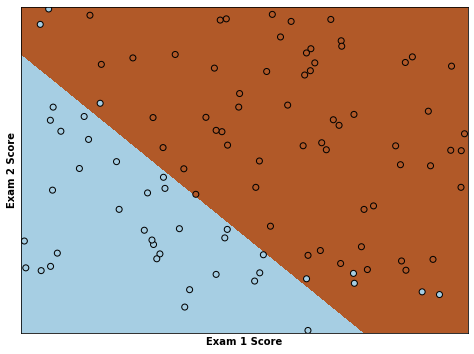

In [ ]:
# Test script for training a logistic regressiom model
#
# This code should run successfully without changes if your implementation is correct
#
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg1():
    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data1.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xstandardized = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegression(regLambda = 15, regNorm = 2)
    logregModel.fit(Xstandardized,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Z = logregModel.predict(allPoints)
    # print(Z)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

test_logreg1()

# Map Feature

In [3]:
def mapFeature(X, column1, column2, maxPower = 6):
    '''
    Maps the two specified input features to quadratic features. Does not standardize any features.
        
    Returns a new feature array with d features, comprising of
        X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, ... up to the maxPower polynomial
        
    Arguments:
        X is an n-by-d Pandas data frame, where d > 2
        column1 is the string specifying the column name corresponding to feature X1
        column2 is the string specifying the column name corresponding to feature X2
    Returns:
        an n-by-d2 Pandas data frame, where each row represents the original features augmented with the new features of the corresponding instance
    '''
    
    X1 = X.iloc[:,column1].values
    X2 = X.iloc[:,column2].values
    
    n,d = X.shape
        
    for i in range(maxPower+1):
        if i == 0:
            mapX = pd.DataFrame(np.ones(n))
        else:
            for j in range(i+1):
                newcol = (X1**(i-j)) * (X2**(j))
                mapX = pd.concat([mapX, pd.DataFrame(newcol)], axis = 1, ignore_index = True)
    
    mapX = mapX.drop(columns = [0])
    
    return mapX

# Test Logistic Regression 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: RuntimeWarning: overflow encountered in exp


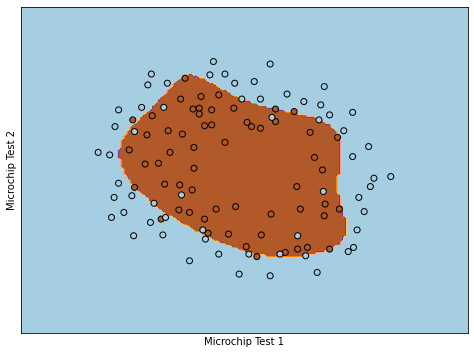

0 1


In [7]:
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg2():

    polyPower = 6

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data2.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # map features into a higher dimensional feature space
    Xaug = mapFeature(X.copy(), X.columns[0], X.columns[1], polyPower)

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegression(regLambda = 0.03, regNorm=2)
    logregModel.fit(Xaug,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = mapFeature(allPoints, allPoints.columns[0], allPoints.columns[1], polyPower)
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # standardize data
    
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()


    print(str(Z.min()) + " " + str(Z.max()))

test_logreg2()

# Logistic Regression with Adagrad

In [6]:
import random

class LogisticRegressionAdagrad:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2, epsilon=0.0001, maxNumIters = 10, initTheta = None):
        '''
        Constructor
        Arguments:
            alpha is the learning rate
            regLambda is the regularization parameter
            regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
            epsilon is the convergence parameter
            maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.e = epsilon
        self.maxRep = maxNumIters
        self.initTheta = initTheta
        self.theta = initTheta
        
        self.conv = False
        self.JHist = []
    
    

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        
        thetaX = X * theta
        h_X = self.sigmoid(thetaX)
        n,d = X.shape
        if self.regNorm == 2:
            cost = -(y.T * np.log(h_X) + (1 - y).T * np.log(1-h_X)) + regLambda * (np.linalg.norm(theta[1:])**2)
        else:
            if self.regNorm == 1:
                cost = -(y.T * np.log(h_X) + (1 - y).T * np.log(1-h_X)) + regLambda * np.linalg.norm(theta[1:], 1)
        
        return cost.item(0)

    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        
        thetaX = X * theta
        h_X = self.sigmoid(thetaX)
        h_X = h_X[0,0]
        y = y[0]
        X = np.array([X]).T
        d = len(X)
        
        Gradient = np.zeros((d,1))
        if self.regNorm == 2:
            Gradient = X * (h_X - y) + regLambda * theta
            # print(Gradient)
        else:
            if self.regNorm == 1:
                L1 = np.matrix(np.zeros((d,1)))
                for i in range(len(theta)):
                    if theta[i] > 0:
                        L1[i] = 1
                    else:
                        if theta[i] == 0:
                            L1[i] = 0
                        else:
                            L1[i] = -1
            Gradient = X * (h_X - y) + regLambda * L1
        
        Gradient[0] = np.sum(h_X - y)
        
        return Gradient
    


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        
        # Shuffle the indexes
        indexes = list(X.index)
        random.seed(10)
        random.shuffle(indexes)
    
        n = len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        n,d = X.shape
        y = y.to_numpy()
        y = y.reshape(n,1)
        
        X_shuffle = np.zeros((n,d))
        y_shuffle = np.zeros((n,1))
        for m in range(n):
            X_shuffle[m,:] = X[indexes[m],:]
            y_shuffle[m,:] = y[indexes[m],:]
        X = X_shuffle
        y = y_shuffle
        
        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))
        
        i = 0   # Number of iteration
        repeatNum = 0    # Number of repetition
        self.JHist = []
        G = np.zeros(d)
        
        while self.conv == False and repeatNum < self.maxRep:
            for j in range(n):
                self.JHist.append(self.computeCost(self.theta, X, y, self.regLambda))    # Compute cost
                print("Iter: ", i+1, " Cost: ", self.JHist[i], " Theta: ", self.theta.T)

                # Gradient Descent
                lasttheta = np.array(self.theta)
                gradient = self.computeGradient(self.theta, X[j,:], y[j], self.regLambda)
                
                # Adagrad step
                for k in range(d):
                    G[k] = G[k] + (gradient[k]**2)
                    self.theta[k] = self.theta[k] - (self.alpha / ((G[k]**0.5) + 0.0000001)) * gradient[k]  
                
                if np.linalg.norm(self.theta-lasttheta) < self.e:   # Check convergence
                    self.conv = True
                    break
                    
                i = i+1
            
            repeatNum = repeatNum + 1
        
        print(self.conv)  
        
        
        
    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        
        n,d = X.shape
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        
        thetaX = X * self.theta
        h_X = self.sigmoid(thetaX)
        pred = []
        for i in range(len(h_X)):
            if h_X[i] > 0.5:
                pred.append(1)
            else:
                pred.append(0)
        
        return pd.DataFrame(pred) 
        
        
        
    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        
        n,d = X.shape
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        
        thetaX = X * self.theta
        pred_p = self.sigmoid(thetaX)
        
        return pd.DataFrame(pred_p) 



    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        
        Z = 1 / (1 + np.exp(-Z))
        
        return Z
    

In [ ]:
filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data2.csv"
df = pd.read_csv(filepath, header = None)

X = df[df.columns[0:2]]
y = df[df.columns[2]]

n,d = X.shape

# map features into a higher dimensional feature space
Xaug = mapFeature(X.copy(), X.columns[0], X.columns[1], 6)

# # Standardize features
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # compute mean and stdev on training set for standardization
    
# train logistic regression
logregModel = LogisticRegressionAdagrad(regLambda = 0.000001, regNorm=1)
logregModel.fit(Xaug,y)